In [1]:
import pandas as pd
import numpy as np


ds = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
ds.rename(columns ={'selling_price':'price','km_driven':'distance'}, inplace = True)
ds.head()

,name,year,price,distance,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
ds.shape

(4340, 8)

In [3]:
ds['name'].unique()
print(len(ds['name'].unique()))

1491


In [4]:
max_year = ds['year'].max()
min_year = ds['year'].min()
max_price = ds['price'].max()
min_price = ds['price'].min()
avg_price = ds['price'].mean()
max_distance = ds['distance'].max()
min_distance = ds['distance'].min()
avg_distance = ds['distance'].mean()

des = {
    'max_year':max_year,
    'min_year':min_year,
    'max_price':max_price,
    'min_price':max_price,
    'avg_price':avg_price,
    'max_distance':max_distance,
    'min_distance':min_distance,
    'avg_distance':avg_distance
}
des_pd = pd.DataFrame(des,index=[0])
des_pd

,max_year,min_year,max_price,min_price,avg_price,max_distance,min_distance,avg_distance
0,2020,1992,8900000,8900000,504127.311751,806599,1,66215.777419


In [5]:
new = ds['name'].str.split(" ",expand=True)

new

,0,1,2,3,4,5,6,7,8,9
0,Maruti,800,AC,None,None,None,None,None,None,None
1,Maruti,Wagon,R,LXI,Minor,None,None,None,None,None
2,Hyundai,Verna,1.6,SX,None,None,None,None,None,None
3,Datsun,RediGO,T,Option,None,None,None,None,None,None
4,Honda,Amaze,VX,i-DTEC,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai,i20,Magna,1.4,CRDi,(Diesel),None,None,None,None
4336,Hyundai,i20,Magna,1.4,CRDi,None,None,None,None,None
4337,Maruti,800,AC,BSIII,None,None,None,None,None,None
4338,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None


In [7]:
ds['car_make'] = new[0]
ds['car_model'] = new[1]
ds.drop(['name'], axis=1, inplace = True)
ds

,year,price,distance,fuel,seller_type,transmission,owner,car_make,car_model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze
...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta


In [11]:
y = ds['price']
x = ds.drop(['price'], axis=1)
num_column = ['year','distance']

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ds_scaled = pd.DataFrame(x)
ds_scaled[num_column] = scaler.fit_transform(ds_scaled[num_column])
ds_scaled

,year,distance,fuel,seller_type,transmission,owner,car_make,car_model
0,0.535714,0.086783,Petrol,Individual,Manual,First Owner,Maruti,800
1,0.535714,0.061988,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,0.714286,0.123976,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,0.892857,0.057028,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,0.785714,0.174807,Diesel,Individual,Manual,Second Owner,Honda,Amaze
...,...,...,...,...,...,...,...,...
4335,0.785714,0.099181,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4336,0.785714,0.099181,Diesel,Individual,Manual,Second Owner,Hyundai,i20
4337,0.607143,0.102900,Petrol,Individual,Manual,Second Owner,Maruti,800
4338,0.857143,0.111579,Diesel,Individual,Manual,First Owner,Hyundai,Creta


In [14]:
from sklearn.model_selection import train_test_split


ds_preprocessed = pd.get_dummies(ds_scaled)

x_train, x_test, y_train, y_test = train_test_split(ds_preprocessed, y, test_size=0.3, random_state=10)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(x_test)

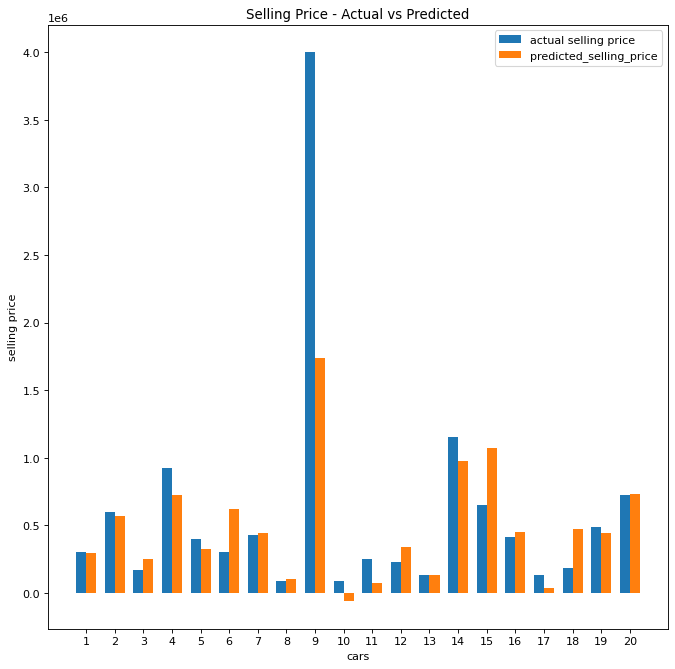

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

ind = np.arange(20)
width = 0.35
figure(figsize=(10, 10), dpi=80)

plt.bar(ind, y_test[:20], width, label='actual selling price')
plt.bar(ind+width, y_pred[:20], width, label='predicted_selling_price')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.legend(loc='best')

plt.xlabel("cars")
plt.ylabel("selling price")
plt.title("Selling Price - Actual vs Predicted")

plt.show()

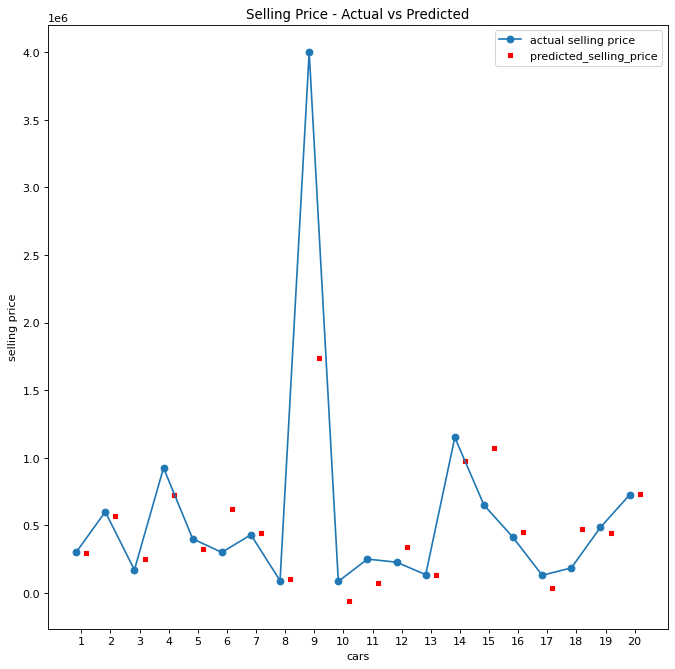

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

ind = np.arange(20)
figure(figsize=(10, 10), dpi=80)

plt.plot(ind, y_test[:20], label='actual selling price',marker = 'o')
plt.scatter(ind+width, y_pred[:20], label='predicted_selling_price', marker = ',', s=20, color='red')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.legend(loc='best')

plt.xlabel("cars")
plt.ylabel("selling price")
plt.title("Selling Price - Actual vs Predicted")

plt.show()

In [ ]:
import seaborn as sn
